# **Tea bag index (TBI) and decomposition kinetics in cranberry agroecosystems** 

## Wilfried Dossou-Yovo, Serge Étienne Parent,Noura Ziadi, Élizabeth Parent and Léon Étienne Parent

In [113]:
Sys.Date()

[1] "2020-01-31"

## Objective

This Jupiter Notbook codes aiming to describe computations methodology used to derive the results and conclusions of of Tea bag index (TBI) and decomposition kinetics in cranberry agroecosystems. The data set from 2017 trial is a collection of incubated tea bag weight, nitrogen, carbon and sulfur content, nitrogen type and doses on trials fieds. 
The aims of this study were to measure the TBI and kinetics of plant residue decomposition to estimate soil sequestration capacity in cranberry stands of eastern Canada.

# 1- Packages loading

We need package [tidyverse](https://www.tidyverse.org/) which loads a set of packages for easy data manipulation(Ex: [dplyr](https://www.rdocumentation.org/packages/dplyr/versions/0.7.8)) and visualization (ex: [ggplot2](https://www.rdocumentation.org/packages/ggplot2/versions/3.2.1)). A set of other packages is used: [readxl](https://www.rdocumentation.org/packages/readxl/versions/0.1.1) for importing xlsx files, [nlme](https://www.rdocumentation.org/packages/nlme/versions/3.1-143/topics/nlme) for fitting a nonlinear mixed-effects model, [e1071](https://www.rdocumentation.org/packages/e1071/versions/1.7-3) for latent class analysis.

In [1]:
library("readxl")
library("tidyverse")
library("nlme")
library('e1071')

Warning message:
"package 'readxl' was built under R version 3.6.2"Warning message:
"package 'tidyverse' was built under R version 3.6.2"-- Attaching packages --------------------------------------- tidyverse 1.3.0 --
v ggplot2 3.2.1     v purrr   0.3.3
v tibble  2.1.3     v dplyr   0.8.3
v tidyr   1.0.0     v stringr 1.4.0
v readr   1.3.1     v forcats 0.4.0
Warning message:
"package 'ggplot2' was built under R version 3.6.2"Warning message:
"package 'tibble' was built under R version 3.6.2"Warning message:
"package 'tidyr' was built under R version 3.6.2"Warning message:
"package 'readr' was built under R version 3.6.2"Warning message:
"package 'purrr' was built under R version 3.6.2"Warning message:
"package 'dplyr' was built under R version 3.6.2"Warning message:
"package 'stringr' was built under R version 3.6.2"Warning message:
"package 'forcats' was built under R version 3.6.2"-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() mask

 # 3- Import data

In [2]:
Data_1 <- read.csv("DATA 1.2.csv",
                   header = TRUE, stringsAsFactors = TRUE,
                   dec=',', sep=';',  na.strings = "")

# 4- Data analysis 

## 4-1 Computation of Carbon, Nitrogen and Sulfur content

In [3]:
Data_1$Teneur_Cf <- Data_1$Pourcentage_C * Data_1$Poids_Restant_g / 100
Data_1$Teneur_Nf <- Data_1$Pourcentage_N * Data_1$Poids_Restant_g / 100
Data_1$Teneur_Sf <- Data_1$Pourcentage_S * Data_1$Poids_Restant_g / 100 

 ## 4-2 Pseudo R² Formula

Pseudo R square allows us to choose which model fit best with our data. We implement a mixed model with or without random effect.The higher R square, the best is the model 

In [4]:
pseudoR2 <- function(y, y_hat) {
  1 - (sum((y - y_hat)^2) / sum((y - mean(y))^2))
}

# Residuals
residues <- function(model, level = 0, computeResidues = TRUE, residues,
                   main = "") {
  library(e1071)
  if (computeResidues) {
    r = residuals(model, type="normalized", level)
  } else {
    r = residues
  }
  hist(r, freq=F, main = main, breaks=20)
  xfit<-seq(min(r),max(r),length=40)
  yfit<-dnorm(xfit)
  lines(xfit, yfit, col="red", lwd=2)
  print("Shapiro-Wilk:")
  print(shapiro.test(r))
  print(paste("Kurtosis:", kurtosis(r)))
  print(paste("Skewness:", skewness(r)))
}


## 4-3 PREPROCESS : weight loss rate

Weight loss rate has been estimate by: $k_1 = (-ln(M(t)/M_0 )) ⁄ t$ 

Where `M_0` is initial litter organic mass, `M(t)` is litter organic mass that remains after incubation time `t = 90 days` , and `k_1` is decomposition rate. 

In [5]:
Data_1$PertePoids <- -log(Data_1$Poids_Restant_g/Data_1$PoidsContenu_g)/90

##  - Label repetitions in such a way they are unique per field and dose

In [7]:
Data_1$DoseRep = paste0(Data_1$Dose, '_', Data_1$Repetition,'_', Data_1$Site)

## 4-5 Data exploration

In [8]:
head(Data_1)

No,TypeThe,TeaType,PoidsContenu_g,PoidsTotal._g,PoidsSac_g,Poids_Restant_g,Farmers,Site,Regie,...,Teneur_Ci,GreenTMoy_C,GreenTMoy_N,GreenTMoy_S,Teneur_Cf,Teneur_Nf,Teneur_Sf,PertePoids,TauxDecomposition_C,DoseRep
1,G,Green tea,1.793,2.019,0.226,0.783,Belanger,A9,Biologique,...,0.8605444,"47,99466667","3,377","0,193666667",0.3926275,0.04134945,0.00227070,0.009205698,0.008718931,0_1_A9
2,G,Green tea,1.786,2.011,0.225,0.797,Belanger,A9,Biologique,...,0.8571847,Rooibos teaMoy_C,Rooibos teaMoy_N,Rooibos teaMoy_S,0.4059360,0.03513335,0.00200047,0.008965323,0.008305088,0_1_A9
3,G,Green tea,1.782,2.008,0.228,NA,Belanger,A9,Biologique,...,0.8552650,"47,79166667","1,040022222","0,090222222",NA,NA,NA,NA,NA,0_1_A9
4,G,Green tea,1.760,1.987,0.227,0.778,Belanger,A9,Biologique,...,0.8447061,ResiduCan_C,ResiduCan_N,ResiduCan_S,0.3912718,0.04232087,0.00230288,0.009070473,0.008550960,0_2_A9
5,G,Green tea,1.788,2.013,0.226,0.779,Belanger,A9,Biologique,...,0.8581446,"50,033","0,90172","0,0757",0.3717232,0.03796456,0.00215783,0.009231577,0.009295812,0_2_A9
6,G,Green tea,1.779,2.004,0.227,NA,Belanger,A9,Biologique,...,0.8538251,Hibiscus TeaTMoy_C,Hibiscus TeaTMoy_N,Hibiscus TeaTMoy_S,NA,NA,NA,NA,NA,0_2_A9


### - Boxplot

Warning message:
"Removed 49 rows containing non-finite values (stat_boxplot)."

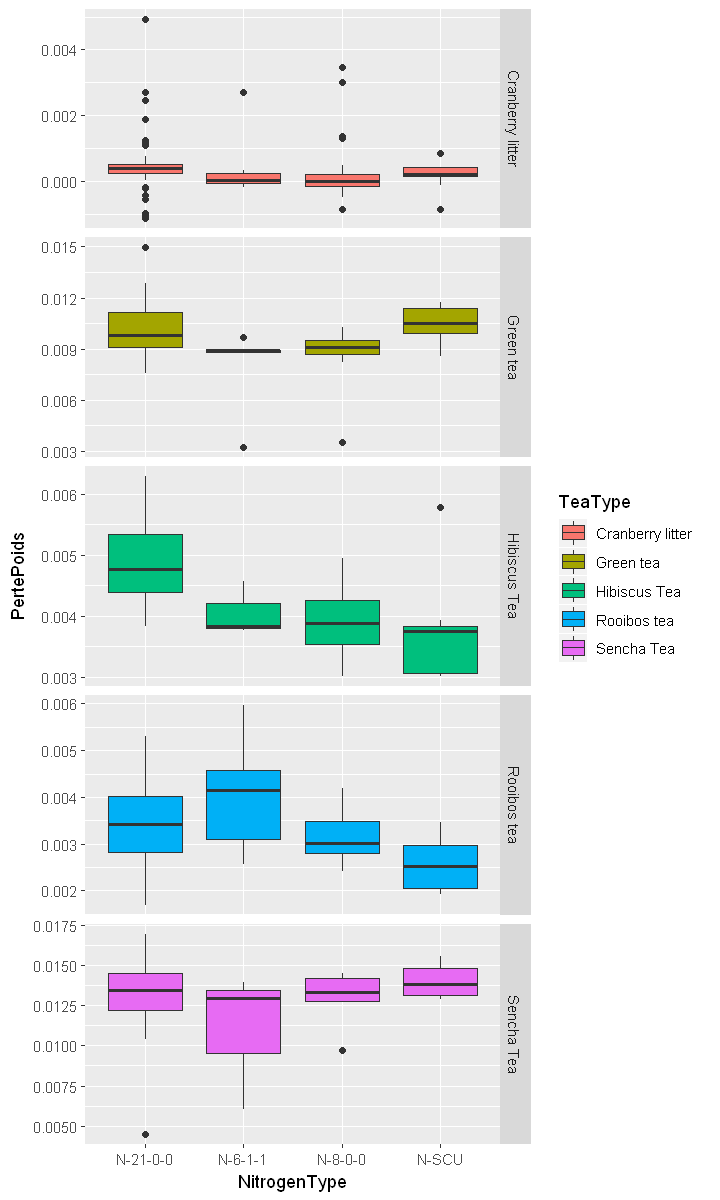

In [9]:
options(repr.plot.width=6, repr.plot.height=10)
ggplot(data = Data_1,
       mapping = aes(x = NitrogenType, y = PertePoids)) +
  facet_grid(TeaType ~ ., scales = "free") +
  geom_boxplot(mapping = aes(fill = TeaType))

## - Cranberry residues are the reference to assess the effect of the kind of matter analysed

In [10]:
Data_1$TeaType = relevel(Data_1$TeaType, ref = 'Cranberry litter')

# 4-6 What's affecting litters weight?
### prepare data

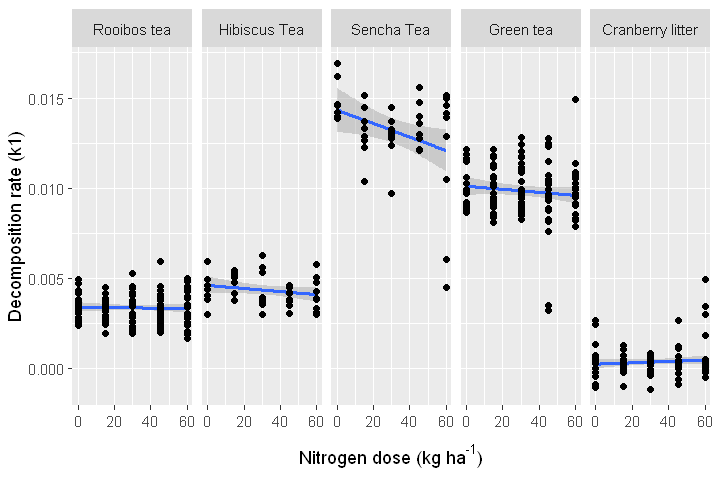

In [11]:
weightdiff_data = Data_1 %>%
  select(PertePoids,#C_over_N,
         TeaType, NitrogenType, DoseN, Farmers, Site, DoseRep) %>%
  drop_na(.) %>%
  droplevels(.)
weightdiff_data_factor <- weightdiff_data
weightdiff_data_factor$TeaType <- factor(weightdiff_data$TeaType, 
                                  levels = levels(weightdiff_data$TeaType)[c(4,3,5,2,1)]) # Reorder

options(repr.plot.width=6, repr.plot.height=4)

ggplot(weightdiff_data_factor, aes(x=DoseN, y=PertePoids)) +
  facet_grid(. ~ TeaType) +
  geom_smooth(method='lm') +
  labs(x = expression("Nitrogen dose (kg ha"^"-1"*")"),
       y = "Decomposition rate (k1)") +     #expression(frac(-ln(frac(Final~weight, Initial~weight)), 90))) +
  geom_point()

## Export plot high resolution

In [12]:
ggsave("Figure1.png", width = 10, height = 6, dpi = 600)

## 4-7 Mixed model

In [13]:
weightdiff_data$DoseN_scaled = scale(weightdiff_data$DoseN)

In [14]:
weightdiff_mm <- lme(fixed = PertePoids ~ TeaType + #C_over_N + 
                       NitrogenType + DoseN_scaled*TeaType,
                     random = ~ 1 | Farmers/Site, #/DoseRep,
                     data = weightdiff_data)

In [15]:
summary(weightdiff_mm)

Linear mixed-effects model fit by REML
 Data: weightdiff_data 
        AIC       BIC   logLik
  -4768.036 -4702.146 2400.018

Random effects:
 Formula: ~1 | Farmers
        (Intercept)
StdDev: 0.000455883

 Formula: ~1 | Site %in% Farmers
         (Intercept)   Residual
StdDev: 0.0005370296 0.00114188

Fixed effects: PertePoids ~ TeaType + NitrogenType + DoseN_scaled * TeaType 
                                        Value    Std.Error  DF  t-value p-value
(Intercept)                       0.000263586 0.0004452691 451  0.59197  0.5542
TeaTypeGreen tea                  0.009430244 0.0001437320 451 65.60990  0.0000
TeaTypeHibiscus Tea               0.003919104 0.0002016727 451 19.43299  0.0000
TeaTypeRooibos tea                0.002965359 0.0001438861 451 20.60907  0.0000
TeaTypeSencha Tea                 0.012679921 0.0002071557 451 61.20962  0.0000
NitrogenTypeN-6-1-1               0.000375193 0.0004117926 451  0.91112  0.3627
NitrogenTypeN-8-0-0               0.000541718 0.0004462445 

In [16]:
anova(weightdiff_mm)

,numDF,denDF,F-value,p-value
(Intercept),1,451,153.9293881,0.000000000
TeaType,4,451,1671.0689584,0.000000000
NitrogenType,3,451,0.6582364,0.578117220
DoseN_scaled,1,451,4.0203558,0.045551301
TeaType:DoseN_scaled,4,451,4.7001931,0.001003031


In [17]:
pseudoR2(y = weightdiff_data$PertePoids,
         y_hat = predict(weightdiff_mm, level = 0))

[1] 0.9233087

[1] "Shapiro-Wilk:"

	Shapiro-Wilk normality test

data:  r
W = 0.89819, p-value < 2.2e-16

[1] "Kurtosis: 7.23353285294641"
[1] "Skewness: -0.718410912629998"


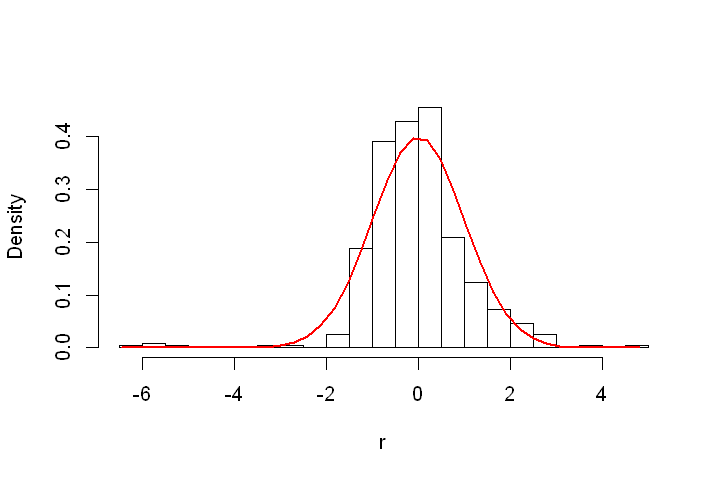

In [18]:
residues(weightdiff_mm)

In [19]:
weightdiff_gg = data.frame(intervals(weightdiff_mm, which = "fixed")$fixed)

In [20]:
weightdiff_gg$pvalue = summary(weightdiff_mm)$tTable[, 5]

In [21]:
weightdiff_gg$is_significant = ifelse(weightdiff_gg$pvalue <= 0.05,
                                      'Significant at 0.05 level',
                                      'Not significant at 0.05 level')

In [22]:
weightdiff_gg$variable = rownames(weightdiff_gg)

In [23]:
weightdiff_gg

,lower,est.,upper,pvalue,is_significant,variable
(Intercept),-0.0006114733,2.635865e-04,1.138646e-03,5.541665e-01,Not significant at 0.05 level,(Intercept)
TeaTypeGreen tea,0.0091477761,9.430244e-03,9.712711e-03,7.979065e-233,Significant at 0.05 level,TeaTypeGreen tea
TeaTypeHibiscus Tea,0.0035227689,3.919104e-03,4.315439e-03,1.476689e-61,Significant at 0.05 level,TeaTypeHibiscus Tea
TeaTypeRooibos tea,0.0026825883,2.965359e-03,3.248129e-03,5.528742e-67,Significant at 0.05 level,TeaTypeRooibos tea
TeaTypeSencha Tea,0.0122728105,1.267992e-02,1.308703e-02,1.345405e-220,Significant at 0.05 level,TeaTypeSencha Tea
NitrogenTypeN-6-1-1,-0.0004340772,3.751933e-04,1.184464e-03,3.627178e-01,Not significant at 0.05 level,NitrogenTypeN-6-1-1
NitrogenTypeN-8-0-0,-0.0003352582,5.417184e-04,1.418695e-03,2.254022e-01,Not significant at 0.05 level,NitrogenTypeN-8-0-0
NitrogenTypeN-SCU,-0.0001914179,1.964019e-04,5.842216e-04,3.201500e-01,Not significant at 0.05 level,NitrogenTypeN-SCU
DoseN_scaled,-0.0001090804,9.026628e-05,2.896129e-04,3.740044e-01,Not significant at 0.05 level,DoseN_scaled
TeaTypeGreen tea:DoseN_scaled,-0.0005561391,-2.729316e-04,1.027598e-05,5.887384e-02,Not significant at 0.05 level,TeaTypeGreen tea:DoseN_scaled


### - Ajust name

In [24]:
weightdiff_gg$variable[c(2,3,4,5,6,7,8,10,11,12,13)] <- c('Green Tea','Hibiscus Tea','Rooibos Tea',
                                   'Sencha Tea', 'N-6-1-1','N-8-0-0', 'N-SCU-39-0-0',
                                   'Green Tea : DoseN_scaled',
                                   'Hibiscus Tea : DoseN_scaled','Rooibos Tea : DoseN_scaled',
                                   'Sencha Tea : DoseN_scaled')

In [25]:
weightdiff_gg$variable

[1] "(Intercept)"                 "Green Tea"                  
 [3] "Hibiscus Tea"                "Rooibos Tea"                
 [5] "Sencha Tea"                  "N-6-1-1"                    
 [7] "N-8-0-0"                     "N-SCU-39-0-0"               
 [9] "DoseN_scaled"                "Green Tea : DoseN_scaled"   
[11] "Hibiscus Tea : DoseN_scaled" "Rooibos Tea : DoseN_scaled" 
[13] "Sencha Tea : DoseN_scaled"

In [26]:
target <- c('(Intercept)',"Hibiscus Tea", "Rooibos Tea", "Sencha Tea", "Green Tea",'N-6-1-1','N-8-0-0', 
            'N-SCU-39-0-0',"DoseN_scaled", 'Green Tea : DoseN_scaled', 
            'Sencha Tea : DoseN_scaled', 'Rooibos Tea : DoseN_scaled', 'Hibiscus Tea : DoseN_scaled')

In [27]:
target 

[1] "(Intercept)"                 "Hibiscus Tea"               
 [3] "Rooibos Tea"                 "Sencha Tea"                 
 [5] "Green Tea"                   "N-6-1-1"                    
 [7] "N-8-0-0"                     "N-SCU-39-0-0"               
 [9] "DoseN_scaled"                "Green Tea : DoseN_scaled"   
[11] "Sencha Tea : DoseN_scaled"   "Rooibos Tea : DoseN_scaled" 
[13] "Hibiscus Tea : DoseN_scaled"

In [28]:
weightdiff_gg$variable

[1] "(Intercept)"                 "Green Tea"                  
 [3] "Hibiscus Tea"                "Rooibos Tea"                
 [5] "Sencha Tea"                  "N-6-1-1"                    
 [7] "N-8-0-0"                     "N-SCU-39-0-0"               
 [9] "DoseN_scaled"                "Green Tea : DoseN_scaled"   
[11] "Hibiscus Tea : DoseN_scaled" "Rooibos Tea : DoseN_scaled" 
[13] "Sencha Tea : DoseN_scaled"

In [29]:
weightdiff_gg <- weightdiff_gg[match(target, weightdiff_gg$variable),] 

In [30]:
weightdiff_gg

,lower,est.,upper,pvalue,is_significant,variable
(Intercept),-0.0006114733,2.635865e-04,1.138646e-03,5.541665e-01,Not significant at 0.05 level,(Intercept)
TeaTypeHibiscus Tea,0.0035227689,3.919104e-03,4.315439e-03,1.476689e-61,Significant at 0.05 level,Hibiscus Tea
TeaTypeRooibos tea,0.0026825883,2.965359e-03,3.248129e-03,5.528742e-67,Significant at 0.05 level,Rooibos Tea
TeaTypeSencha Tea,0.0122728105,1.267992e-02,1.308703e-02,1.345405e-220,Significant at 0.05 level,Sencha Tea
TeaTypeGreen tea,0.0091477761,9.430244e-03,9.712711e-03,7.979065e-233,Significant at 0.05 level,Green Tea
NitrogenTypeN-6-1-1,-0.0004340772,3.751933e-04,1.184464e-03,3.627178e-01,Not significant at 0.05 level,N-6-1-1
NitrogenTypeN-8-0-0,-0.0003352582,5.417184e-04,1.418695e-03,2.254022e-01,Not significant at 0.05 level,N-8-0-0
NitrogenTypeN-SCU,-0.0001914179,1.964019e-04,5.842216e-04,3.201500e-01,Not significant at 0.05 level,N-SCU-39-0-0
DoseN_scaled,-0.0001090804,9.026628e-05,2.896129e-04,3.740044e-01,Not significant at 0.05 level,DoseN_scaled
TeaTypeGreen tea:DoseN_scaled,-0.0005561391,-2.729316e-04,1.027598e-05,5.887384e-02,Not significant at 0.05 level,Green Tea : DoseN_scaled


In [31]:
weightdiff_gg$facet = factor(c('Intercept',
                               'Tea type', 'Tea type', 'Tea type', 'Tea type',
                               'N source', 'N source', 'N source',
                               'N dosage',
                               'Tea type x N dosage', 'Tea type x N dosage', 
                               'Tea type x N dosage', 'Tea type x N dosage'))

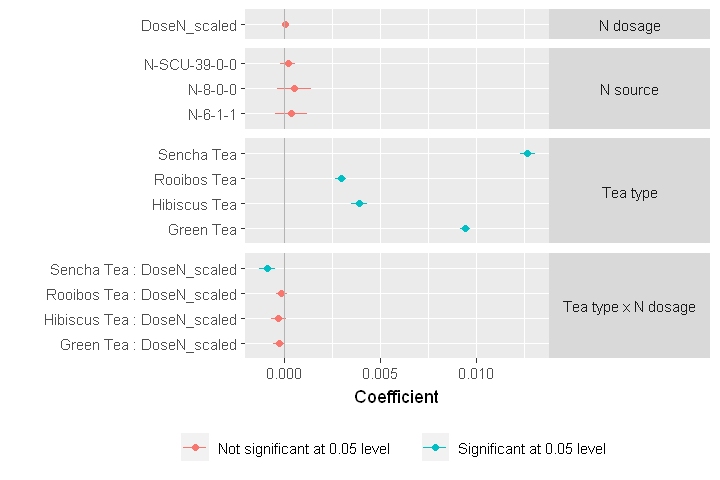

In [32]:
weightdiff_gg = weightdiff_gg[-1, ] # remove the intercept
ggplot(weightdiff_gg, aes(x = est., y=variable, colour=is_significant)) +
  facet_grid(facet ~ ., scales = 'free', space = 'free') +
  geom_point() +
  geom_segment(aes(x=lower, xend=upper, y=variable, yend=variable)) +
  geom_vline(xintercept = 0, colour='grey70') +
  xlab('Coefficient') +
  ylab('') +
  theme(strip.text.y = element_text(angle=0),
        legend.title = element_blank(),
        legend.position = "bottom")

### Export plot high resolution

In [33]:
ggsave("Figure2.png", width = 8, height = 5, dpi = 600)

# 5- Tea bag index

In [34]:
head(Data_1)

No,TypeThe,TeaType,PoidsContenu_g,PoidsTotal._g,PoidsSac_g,Poids_Restant_g,Farmers,Site,Regie,...,Teneur_Ci,GreenTMoy_C,GreenTMoy_N,GreenTMoy_S,Teneur_Cf,Teneur_Nf,Teneur_Sf,PertePoids,TauxDecomposition_C,DoseRep
1,G,Green tea,1.793,2.019,0.226,0.783,Belanger,A9,Biologique,...,0.8605444,"47,99466667","3,377","0,193666667",0.3926275,0.04134945,0.00227070,0.009205698,0.008718931,0_1_A9
2,G,Green tea,1.786,2.011,0.225,0.797,Belanger,A9,Biologique,...,0.8571847,Rooibos teaMoy_C,Rooibos teaMoy_N,Rooibos teaMoy_S,0.4059360,0.03513335,0.00200047,0.008965323,0.008305088,0_1_A9
3,G,Green tea,1.782,2.008,0.228,NA,Belanger,A9,Biologique,...,0.8552650,"47,79166667","1,040022222","0,090222222",NA,NA,NA,NA,NA,0_1_A9
4,G,Green tea,1.760,1.987,0.227,0.778,Belanger,A9,Biologique,...,0.8447061,ResiduCan_C,ResiduCan_N,ResiduCan_S,0.3912718,0.04232087,0.00230288,0.009070473,0.008550960,0_2_A9
5,G,Green tea,1.788,2.013,0.226,0.779,Belanger,A9,Biologique,...,0.8581446,"50,033","0,90172","0,0757",0.3717232,0.03796456,0.00215783,0.009231577,0.009295812,0_2_A9
6,G,Green tea,1.779,2.004,0.227,NA,Belanger,A9,Biologique,...,0.8538251,Hibiscus TeaTMoy_C,Hibiscus TeaTMoy_N,Hibiscus TeaTMoy_S,NA,NA,NA,NA,NA,0_2_A9


In [35]:
Data_1$M_surM0 <- Data_1$Poids_Restant_g / Data_1$PoidsContenu_g

### - Hydrolysable fraction 

In [36]:
Hf_g = 0.805 
Hf_r = 0.826

### - Keuskamp hydrolisable fraction

In [37]:
#Hf_g = 0.842
#Hf_r = 0.552

In [38]:
Data_1$a = NA
Data_1$k_tbi = NA

In [39]:
Data_1$a[Data_1$TeaType == "Green tea"] = (Data_1$PoidsContenu_g[Data_1$TeaType == "Green tea"] -
                                            Data_1$Poids_Restant_g[Data_1$TeaType == "Green tea"]) /
                                            Data_1$PoidsContenu_g[Data_1$TeaType == "Green tea"]

In [40]:
Data_1$S = 1 - Data_1$a/Hf_g

In [41]:
head(Data_1$S)

[1] 0.3002463 0.3121101        NA 0.3068888 0.2989843        NA

In [42]:
sdr = paste(Data_1$Site, Data_1$DoseN, Data_1$Repetition)
sdr_u = unique(sdr)

In [43]:
for (i in 1:length(sdr_u)) {
  Sg_i = mean(Data_1$S[sdr == sdr_u[i] & Data_1$TeaType == "Green tea"], na.rm = TRUE)
  
  # Rooibos
  Data_1$a[sdr == sdr_u[i] & Data_1$TeaType == "Rooibos tea"] = Hf_r * (1 - Sg_i)
  ar_i = Data_1$a[sdr == sdr_u[i] & Data_1$TeaType == "Rooibos tea"]
  M_surM0_i = Data_1$M_surM0[sdr == sdr_u[i] & Data_1$TeaType == "Rooibos tea"]
  Data_1$k_tbi[sdr == sdr_u[i] & Data_1$TeaType == "Rooibos tea"] = log(ar_i / (M_surM0_i - (1-ar_i))) / 90
  
  
}

In [44]:
Data_1_a_rooibos <- subset(Data_1, TeaType == "Rooibos tea")

In [45]:
head(Data_1_a_rooibos)

,No,TypeThe,TeaType,PoidsContenu_g,PoidsTotal._g,PoidsSac_g,Poids_Restant_g,Farmers,Site,Regie,...,Teneur_Cf,Teneur_Nf,Teneur_Sf,PertePoids,TauxDecomposition_C,DoseRep,M_surM0,a,k_tbi,S
37,1,S,Rooibos tea,1.905,2.134,0.229,1.534,Belanger,A9,Biologique,...,0.6845322,0.009211056,0.000458666,0.002406703,0.003168697,0_1_A9,0.8052493,0.5730968,0.004613835,NA
38,2,S,Rooibos tea,1.892,2.118,0.226,1.497,Belanger,A9,Biologique,...,0.6911499,0.014206530,0.000634728,0.002601904,0.002985712,0_1_A9,0.7912262,0.5730968,0.005033486,NA
39,3,S,Rooibos tea,1.895,2.122,0.228,1.342,Belanger,A9,Biologique,...,0.6611229,0.009743054,0.000452254,0.003833976,0.003496839,0_1_A9,0.7081794,0.5730968,0.007907971,NA
40,4,S,Rooibos tea,1.907,2.138,0.231,1.308,Belanger,A9,Biologique,...,0.6669623,0.012376688,0.000542820,0.004189245,0.003469269,0_2_A9,0.6858941,0.5757744,0.008762639,NA
41,5,S,Rooibos tea,1.910,2.137,0.227,1.532,Belanger,A9,Biologique,...,0.7512928,0.013588687,0.000543860,0.002450324,0.002163824,0_2_A9,0.8020942,0.5757744,0.004679658,NA
42,6,S,Rooibos tea,1.908,2.136,0.229,1.495,Belanger,A9,Biologique,...,0.7426413,0.011089761,0.000287040,0.002710326,0.002280876,0_2_A9,0.7835430,0.5757744,0.005238998,NA


In [46]:
ar_mean <- mean(Data_1_a_rooibos$a)

In [47]:
ar_mean

[1] 0.5980028

In [48]:
head(Data_1_a_rooibos)

,No,TypeThe,TeaType,PoidsContenu_g,PoidsTotal._g,PoidsSac_g,Poids_Restant_g,Farmers,Site,Regie,...,Teneur_Cf,Teneur_Nf,Teneur_Sf,PertePoids,TauxDecomposition_C,DoseRep,M_surM0,a,k_tbi,S
37,1,S,Rooibos tea,1.905,2.134,0.229,1.534,Belanger,A9,Biologique,...,0.6845322,0.009211056,0.000458666,0.002406703,0.003168697,0_1_A9,0.8052493,0.5730968,0.004613835,NA
38,2,S,Rooibos tea,1.892,2.118,0.226,1.497,Belanger,A9,Biologique,...,0.6911499,0.014206530,0.000634728,0.002601904,0.002985712,0_1_A9,0.7912262,0.5730968,0.005033486,NA
39,3,S,Rooibos tea,1.895,2.122,0.228,1.342,Belanger,A9,Biologique,...,0.6611229,0.009743054,0.000452254,0.003833976,0.003496839,0_1_A9,0.7081794,0.5730968,0.007907971,NA
40,4,S,Rooibos tea,1.907,2.138,0.231,1.308,Belanger,A9,Biologique,...,0.6669623,0.012376688,0.000542820,0.004189245,0.003469269,0_2_A9,0.6858941,0.5757744,0.008762639,NA
41,5,S,Rooibos tea,1.910,2.137,0.227,1.532,Belanger,A9,Biologique,...,0.7512928,0.013588687,0.000543860,0.002450324,0.002163824,0_2_A9,0.8020942,0.5757744,0.004679658,NA
42,6,S,Rooibos tea,1.908,2.136,0.229,1.495,Belanger,A9,Biologique,...,0.7426413,0.011089761,0.000287040,0.002710326,0.002280876,0_2_A9,0.7835430,0.5757744,0.005238998,NA


In [49]:
head(Data_1)

No,TypeThe,TeaType,PoidsContenu_g,PoidsTotal._g,PoidsSac_g,Poids_Restant_g,Farmers,Site,Regie,...,Teneur_Cf,Teneur_Nf,Teneur_Sf,PertePoids,TauxDecomposition_C,DoseRep,M_surM0,a,k_tbi,S
1,G,Green tea,1.793,2.019,0.226,0.783,Belanger,A9,Biologique,...,0.3926275,0.04134945,0.00227070,0.009205698,0.008718931,0_1_A9,0.4366983,0.5633017,NA,0.3002463
2,G,Green tea,1.786,2.011,0.225,0.797,Belanger,A9,Biologique,...,0.4059360,0.03513335,0.00200047,0.008965323,0.008305088,0_1_A9,0.4462486,0.5537514,NA,0.3121101
3,G,Green tea,1.782,2.008,0.228,NA,Belanger,A9,Biologique,...,NA,NA,NA,NA,NA,0_1_A9,NA,NA,NA,NA
4,G,Green tea,1.760,1.987,0.227,0.778,Belanger,A9,Biologique,...,0.3912718,0.04232087,0.00230288,0.009070473,0.008550960,0_2_A9,0.4420455,0.5579545,NA,0.3068888
5,G,Green tea,1.788,2.013,0.226,0.779,Belanger,A9,Biologique,...,0.3717232,0.03796456,0.00215783,0.009231577,0.009295812,0_2_A9,0.4356823,0.5643177,NA,0.2989843
6,G,Green tea,1.779,2.004,0.227,NA,Belanger,A9,Biologique,...,NA,NA,NA,NA,NA,0_2_A9,NA,NA,NA,NA


## - Data exploration for N dose type 

In [50]:
Data_1 %>%
  select(NitrogenType, DoseN) %>%
  unique()

,NitrogenType,DoseN
1,N-8-0-0,0
7,N-8-0-0,15
13,N-8-0-0,30
19,N-8-0-0,45
25,N-8-0-0,60
31,N-6-1-1,60
33,N-6-1-1,45
35,N-6-1-1,30
73,N-21-0-0,0
79,N-21-0-0,15


Warning message:
"Removed 388 rows containing non-finite values (stat_boxplot)."

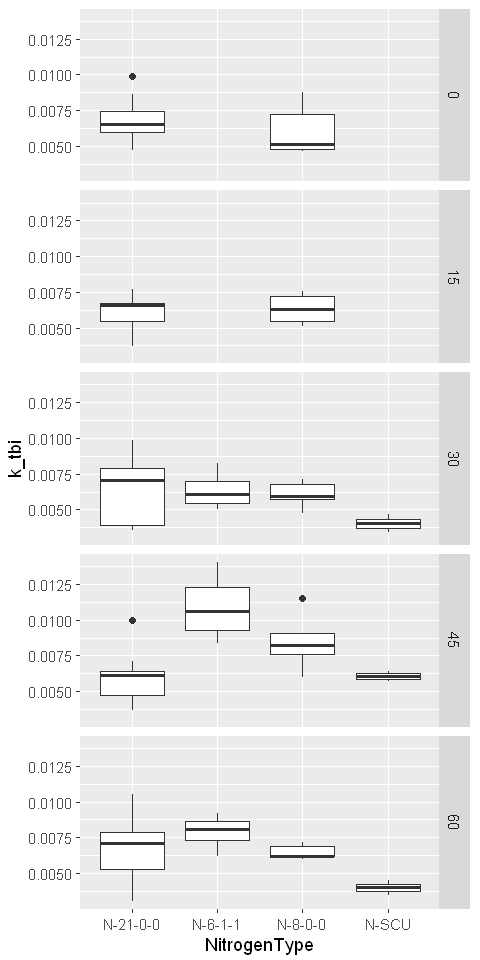

In [51]:
options(repr.plot.width=4, repr.plot.height=8)
ggplot(data = Data_1,
       mapping = aes(x = NitrogenType, y = k_tbi)) +
  facet_grid(DoseN ~ .) +
  geom_boxplot()

# What affecting TBI parameters (k)?

In [52]:
TBI_data = Data_1 %>%
  select(k_tbi, TeaType, Farmers,DoseN, Site, #C_over_N, 
         NitrogenType) %>%
  drop_na(.) %>%
  droplevels(.)
#TBI_data_factor <- TBI_data
#TBI_data_factor$TeaType <- factor(TBI_data$TeaType, 
 #                                      levels = levels(omdecomp_data$TeaType)[c(4,3,5,2,1)]) # Reorder

In [53]:
mean_k_tbi <- mean(TBI_data$k_tbi)

In [54]:
mean_k_tbi

[1] 0.006528233

In [55]:
sd_k_tbi <- sd(TBI_data$k_tbi)

In [56]:
sd_k_tbi

[1] 0.001851479

In [57]:
TBI_rooibos <- subset(TBI_data, TeaType == "Rooibos tea")

In [58]:
lme_TBI <- lme(fixed = k_tbi ~  DoseN + NitrogenType,
    random = ~ 1 | Farmers/Site, #/DoseRep,
    data = TBI_rooibos) # [omdecomp_data$TauxDecomposition_C > 0, ]

Linear mixed-effects model fit by REML
 Data: TBI_rooibos 
        AIC       BIC   logLik
  -1201.875 -1179.377 608.9374

Random effects:
 Formula: ~1 | Farmers
        (Intercept)
StdDev: 0.001058691

 Formula: ~1 | Site %in% Farmers
         (Intercept)    Residual
StdDev: 0.0006061399 0.001526043

Fixed effects: k_tbi ~ DoseN + NitrogenType 
                           Value    Std.Error  DF   t-value p-value
(Intercept)          0.006164356 0.0008636613 120  7.137469  0.0000
DoseN                0.000003116 0.0000066639 120  0.467635  0.6409
NitrogenTypeN-6-1-1  0.002000522 0.0005863409 120  3.411876  0.0009
NitrogenTypeN-8-0-0  0.000668290 0.0006995885 120  0.955262  0.3414
NitrogenTypeN-SCU   -0.000407511 0.0006884892 120 -0.591892  0.5550
 Correlation: 
                    (Intr) DoseN  NTN-6- NTN-8-
DoseN               -0.237                     
NitrogenTypeN-6-1-1 -0.113 -0.165              
NitrogenTypeN-8-0-0 -0.209  0.029  0.536       
NitrogenTypeN-SCU   -0.020 -0.131  0.0

,(Intercept)
Belanger,-0.0006731745
Fortier,0.0006731745
,(Intercept)
Belanger/10,-0.0005293725
Belanger/A9,0.0003087068
Fortier/45,0.0003491925
Fortier/9,-0.0001285268


,Value,Std.Error,DF,t-value,p-value
(Intercept),6.164356e-03,8.636613e-04,120,7.1374693,7.871002e-11
DoseN,3.116282e-06,6.663922e-06,120,0.4676347,6.408939e-01
NitrogenTypeN-6-1-1,2.000522e-03,5.863409e-04,120,3.4118758,8.799726e-04
NitrogenTypeN-8-0-0,6.682900e-04,6.995885e-04,120,0.9552616,3.413659e-01
NitrogenTypeN-SCU,-4.075112e-04,6.884892e-04,120,-0.5918920,5.550364e-01


$names
 [1] "modelStruct"  "dims"         "contrasts"    "coefficients" "varFix"      
 [6] "sigma"        "apVar"        "logLik"       "numIter"      "groups"      
[11] "call"         "terms"        "method"       "fitted"       "residuals"   
[16] "fixDF"        "na.action"    "data"         "corFixed"     "tTable"      
[21] "BIC"          "AIC"         

$class
[1] "summary.lme" "lme"        

$verbose
[1] FALSE

$oClass
[1] "lme"

Approximate 95% confidence intervals

 Fixed effects:
                            lower          est.        upper
(Intercept)          4.454367e-03  6.164356e-03 7.874345e-03
DoseN               -1.007782e-05  3.116282e-06 1.631038e-05
NitrogenTypeN-6-1-1  8.396081e-04  2.000522e-03 3.161436e-03
NitrogenTypeN-8-0-0 -7.168465e-04  6.682900e-04 2.053426e-03
NitrogenTypeN-SCU   -1.770672e-03 -4.075112e-04 9.556494e-04
attr(,"label")
[1] "Fixed effects:"

 Random Effects:
  Level: Farmers 
                       lower        est.       upper
sd((Intercept)) 0.0001646521 0.001058691 0.006807244
  Level: Site 
                       lower         est.       upper
sd((Intercept)) 9.370808e-05 0.0006061399 0.003920746

 Within-group standard error:
      lower        est.       upper 
0.001344597 0.001526043 0.001731973 

,numDF,denDF,F-value,p-value
(Intercept),1,120,64.337170,7.901457e-13
DoseN,1,120,1.232408,2.691589e-01
NitrogenType,3,120,4.453493,5.283390e-03


[1] 0.3004398

[1] "Shapiro-Wilk:"

	Shapiro-Wilk normality test

data:  r
W = 0.9734, p-value = 0.01268

[1] "Kurtosis: 0.247117301424066"
[1] "Skewness: 0.52312331964216"


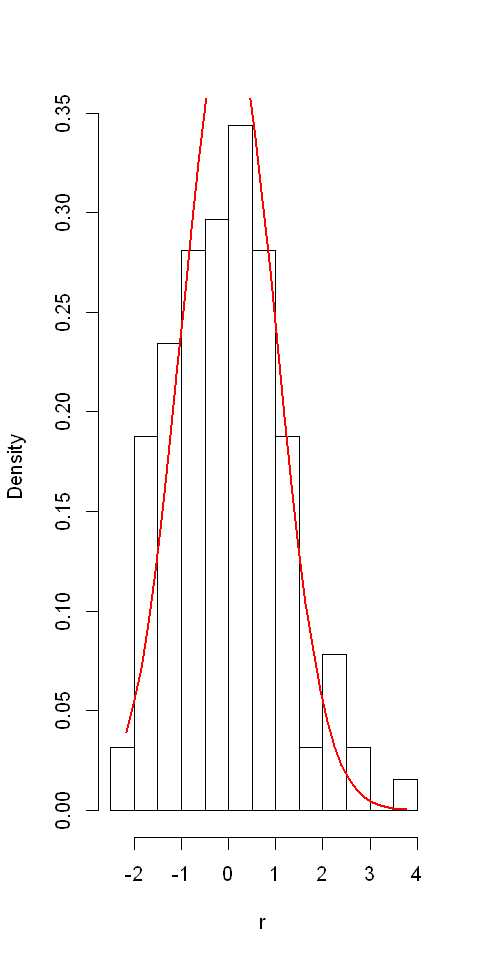

In [59]:
summary(lme_TBI)
ranef(lme_TBI)
summary(lme_TBI)$tTable
attributes(summary(lme_TBI))
intervals(lme_TBI)
anova(lme_TBI)
pseudoR2(y=TBI_rooibos$k_tbi, # [omdecomp_data$TauxDecomposition_C > 0]
         y_hat = predict(lme_TBI, level=1))
residues(lme_TBI)

In [60]:
weightdiff_gg_TBI = data.frame(intervals(lme_TBI, which = "fixed")$fixed)

In [61]:
weightdiff_gg_TBI$pvalue = summary(lme_TBI)$tTable[, 5]

In [62]:
weightdiff_gg_TBI$is_significant = ifelse(weightdiff_gg_TBI$pvalue <= 0.05,
                                      'Significant at 0.05 level',
                                      'Not significant at 0.05 level')

In [63]:
weightdiff_gg_TBI$variable = rownames(weightdiff_gg_TBI)

In [64]:
weightdiff_gg_TBI$variable

[1] "(Intercept)"         "DoseN"               "NitrogenTypeN-6-1-1"
[4] "NitrogenTypeN-8-0-0" "NitrogenTypeN-SCU"

In [65]:
weightdiff_gg_TBI$variable[c(3,4,5)] <- c('N-6-1-1', 'N-8-0-0',
                                   'N-SCU-39-0-0')

In [66]:
weightdiff_gg_TBI$facet = factor(c('Intercept','N dosage',
                               'N source', 'N source', 'N source'))

In [67]:
weightdiff_gg_TBI = weightdiff_gg_TBI[-1, ] # remove the intercept

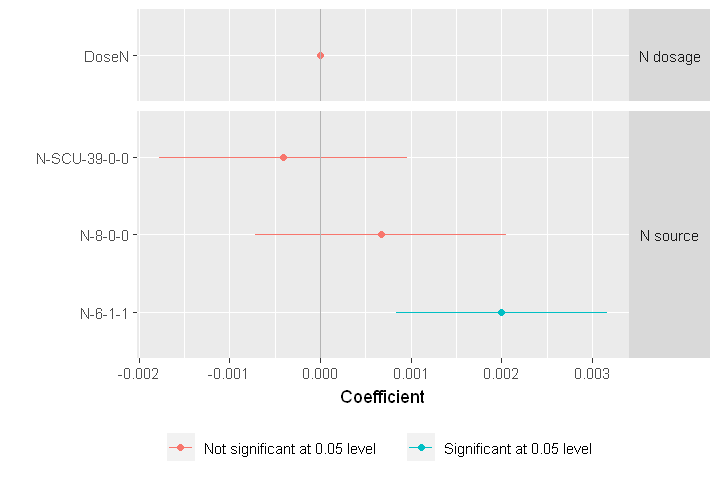

In [68]:
options(repr.plot.width=6, repr.plot.height=4)
ggplot(weightdiff_gg_TBI, aes(x = est., y=variable, colour=is_significant)) +
  facet_grid(facet ~ ., scales = 'free', space = 'free') +
  geom_point() +
  geom_segment(aes(x=lower, xend=upper, y=variable, yend=variable)) +
  geom_vline(xintercept = 0, colour='grey70') +
  xlab('Coefficient') +
  ylab('') +
  theme(strip.text.y = element_text(angle=0),
        legend.title = element_blank(),
        legend.position = "bottom")

In [69]:
ggsave("Figure5.png", width = 8, height = 5, dpi = 600)# export plot high resolution

# What affecting TBI parameters (S)?

In [70]:
S_data = Data_1 %>%
  select(S, TeaType, DoseN, Farmers,Site, #C_over_N, 
         NitrogenType) %>%
  drop_na(.) %>%
  droplevels(.)
#TBI_data_factor <- TBI_data
#TBI_data_factor$TeaType <- factor(TBI_data$TeaType, 
#                                      levels = levels(omdecomp_data$TeaType)[c(4,3,5,2,1)]) # Reorder

In [71]:
TBI_GreenTea <- subset(S_data, TeaType == "Green tea")

In [72]:
head(S_data)

,S,TeaType,DoseN,Farmers,Site,NitrogenType
1,0.3002463,Green tea,0,Belanger,A9,N-8-0-0
2,0.3121101,Green tea,0,Belanger,A9,N-8-0-0
4,0.3068888,Green tea,0,Belanger,A9,N-8-0-0
5,0.2989843,Green tea,0,Belanger,A9,N-8-0-0
7,0.3053422,Green tea,15,Belanger,A9,N-8-0-0
8,0.3101040,Green tea,15,Belanger,A9,N-8-0-0


In [73]:
lme_S <- lme(fixed = S ~  DoseN + NitrogenType,
               random = ~ 1 | Farmers/Site, #/DoseRep,
               data = TBI_GreenTea) # [omdecomp_data$TauxDecomposition_C > 0, ]

Linear mixed-effects model fit by REML
 Data: TBI_GreenTea 
       AIC      BIC  logLik
  -279.136 -256.903 147.568

Random effects:
 Formula: ~1 | Farmers
         (Intercept)
StdDev: 3.723227e-06

 Formula: ~1 | Site %in% Farmers
        (Intercept)   Residual
StdDev:  0.04299008 0.06224558

Fixed effects: S ~ DoseN + NitrogenType 
                          Value  Std.Error  DF   t-value p-value
(Intercept)          0.24656689 0.02701601 116  9.126694  0.0000
DoseN                0.00042329 0.00027815 116  1.521808  0.1308
NitrogenTypeN-6-1-1  0.11853217 0.05742880 116  2.063985  0.0412
NitrogenTypeN-8-0-0  0.05705259 0.05169629 116  1.103611  0.2720
NitrogenTypeN-SCU   -0.00689129 0.02030607 116 -0.339371  0.7349
 Correlation: 
                    (Intr) DoseN  NTN-6- NTN-8-
DoseN               -0.303                     
NitrogenTypeN-6-1-1 -0.409 -0.061              
NitrogenTypeN-8-0-0 -0.473 -0.006  0.846       
NitrogenTypeN-SCU   -0.021 -0.217  0.054  0.047

Standardized Withi

,(Intercept)
Belanger,1.269479e-10
Fortier,-1.269479e-10
,(Intercept)
Belanger/10,1.692478e-02
Belanger/A9,4.672425e-17
Fortier/45,3.045139e-02
Fortier/9,-4.737618e-02


,Value,Std.Error,DF,t-value,p-value
(Intercept),0.2465668857,0.027016012,116,9.1266943,2.635135e-15
DoseN,0.0004232879,0.000278148,116,1.5218079,1.307786e-01
NitrogenTypeN-6-1-1,0.1185321737,0.057428804,116,2.0639847,4.124955e-02
NitrogenTypeN-8-0-0,0.0570525938,0.051696286,116,1.1036111,2.720460e-01
NitrogenTypeN-SCU,-0.0068912866,0.020306074,116,-0.3393707,7.349441e-01


$names
 [1] "modelStruct"  "dims"         "contrasts"    "coefficients" "varFix"      
 [6] "sigma"        "apVar"        "logLik"       "numIter"      "groups"      
[11] "call"         "terms"        "method"       "fitted"       "residuals"   
[16] "fixDF"        "na.action"    "data"         "corFixed"     "tTable"      
[21] "BIC"          "AIC"         

$class
[1] "summary.lme" "lme"        

$verbose
[1] FALSE

$oClass
[1] "lme"

,numDF,denDF,F-value,p-value
(Intercept),1,116,154.592930,0.00000000
DoseN,1,116,2.897476,0.09139685
NitrogenType,3,116,1.972322,0.12198490


[1] 0.3632854

[1] "Shapiro-Wilk:"

	Shapiro-Wilk normality test

data:  r
W = 0.89594, p-value = 8.34e-08

[1] "Kurtosis: 6.33426604324906"
[1] "Skewness: 1.45996663413087"


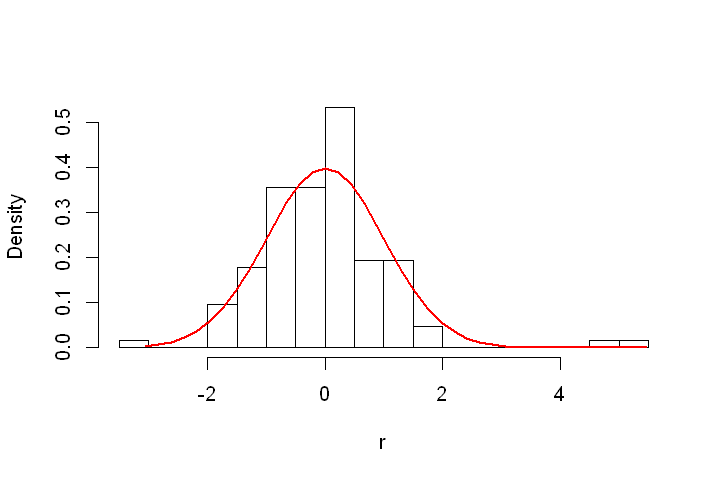

In [74]:
summary(lme_S)
ranef(lme_S)
summary(lme_S)$tTable
attributes(summary(lme_S))
#intervals(lme_S)
anova(lme_S)
pseudoR2(y=TBI_GreenTea$S, # [omdecomp_data$TauxDecomposition_C > 0]
         y_hat = predict(lme_S, level=2))
residues(lme_S)

In [75]:
head(TBI_rooibos)

,k_tbi,TeaType,Farmers,DoseN,Site,NitrogenType
37,0.004613835,Rooibos tea,Belanger,0,A9,N-8-0-0
38,0.005033486,Rooibos tea,Belanger,0,A9,N-8-0-0
39,0.007907971,Rooibos tea,Belanger,0,A9,N-8-0-0
40,0.008762639,Rooibos tea,Belanger,0,A9,N-8-0-0
41,0.004679658,Rooibos tea,Belanger,0,A9,N-8-0-0
42,0.005238998,Rooibos tea,Belanger,0,A9,N-8-0-0


In [76]:
lme_TBI <- lme(fixed = k_tbi ~  DoseN + NitrogenType,
    random = ~ 1 | Farmers/Site, #/DoseRep,
    data = TBI_rooibos) # [omdecomp_data$TauxDecomposition_C > 0, ]

In [77]:
summary(lme_TBI)

Linear mixed-effects model fit by REML
 Data: TBI_rooibos 
        AIC       BIC   logLik
  -1201.875 -1179.377 608.9374

Random effects:
 Formula: ~1 | Farmers
        (Intercept)
StdDev: 0.001058691

 Formula: ~1 | Site %in% Farmers
         (Intercept)    Residual
StdDev: 0.0006061399 0.001526043

Fixed effects: k_tbi ~ DoseN + NitrogenType 
                           Value    Std.Error  DF   t-value p-value
(Intercept)          0.006164356 0.0008636613 120  7.137469  0.0000
DoseN                0.000003116 0.0000066639 120  0.467635  0.6409
NitrogenTypeN-6-1-1  0.002000522 0.0005863409 120  3.411876  0.0009
NitrogenTypeN-8-0-0  0.000668290 0.0006995885 120  0.955262  0.3414
NitrogenTypeN-SCU   -0.000407511 0.0006884892 120 -0.591892  0.5550
 Correlation: 
                    (Intr) DoseN  NTN-6- NTN-8-
DoseN               -0.237                     
NitrogenTypeN-6-1-1 -0.113 -0.165              
NitrogenTypeN-8-0-0 -0.209  0.029  0.536       
NitrogenTypeN-SCU   -0.020 -0.131  0.0

In [78]:
ranef(lme_TBI)

,(Intercept)
Belanger,-0.0006731745
Fortier,0.0006731745
,(Intercept)
Belanger/10,-0.0005293725
Belanger/A9,0.0003087068
Fortier/45,0.0003491925
Fortier/9,-0.0001285268


In [79]:
summary(lme_TBI)$tTable

,Value,Std.Error,DF,t-value,p-value
(Intercept),6.164356e-03,8.636613e-04,120,7.1374693,7.871002e-11
DoseN,3.116282e-06,6.663922e-06,120,0.4676347,6.408939e-01
NitrogenTypeN-6-1-1,2.000522e-03,5.863409e-04,120,3.4118758,8.799726e-04
NitrogenTypeN-8-0-0,6.682900e-04,6.995885e-04,120,0.9552616,3.413659e-01
NitrogenTypeN-SCU,-4.075112e-04,6.884892e-04,120,-0.5918920,5.550364e-01


In [80]:
attributes(summary(lme_TBI))

$names
 [1] "modelStruct"  "dims"         "contrasts"    "coefficients" "varFix"      
 [6] "sigma"        "apVar"        "logLik"       "numIter"      "groups"      
[11] "call"         "terms"        "method"       "fitted"       "residuals"   
[16] "fixDF"        "na.action"    "data"         "corFixed"     "tTable"      
[21] "BIC"          "AIC"         

$class
[1] "summary.lme" "lme"        

$verbose
[1] FALSE

$oClass
[1] "lme"

In [81]:
intervals(lme_TBI)

Approximate 95% confidence intervals

 Fixed effects:
                            lower          est.        upper
(Intercept)          4.454367e-03  6.164356e-03 7.874345e-03
DoseN               -1.007782e-05  3.116282e-06 1.631038e-05
NitrogenTypeN-6-1-1  8.396081e-04  2.000522e-03 3.161436e-03
NitrogenTypeN-8-0-0 -7.168465e-04  6.682900e-04 2.053426e-03
NitrogenTypeN-SCU   -1.770672e-03 -4.075112e-04 9.556494e-04
attr(,"label")
[1] "Fixed effects:"

 Random Effects:
  Level: Farmers 
                       lower        est.       upper
sd((Intercept)) 0.0001646521 0.001058691 0.006807244
  Level: Site 
                       lower         est.       upper
sd((Intercept)) 9.370808e-05 0.0006061399 0.003920746

 Within-group standard error:
      lower        est.       upper 
0.001344597 0.001526043 0.001731973 

In [82]:
anova(lme_TBI)

,numDF,denDF,F-value,p-value
(Intercept),1,120,64.337170,7.901457e-13
DoseN,1,120,1.232408,2.691589e-01
NitrogenType,3,120,4.453493,5.283390e-03


In [83]:
pseudoR2(y=TBI_rooibos$k_tbi, 
         y_hat = predict(lme_TBI, level=2))

[1] 0.3538528

[1] "Shapiro-Wilk:"

	Shapiro-Wilk normality test

data:  r
W = 0.9734, p-value = 0.01268

[1] "Kurtosis: 0.247117301424066"
[1] "Skewness: 0.52312331964216"


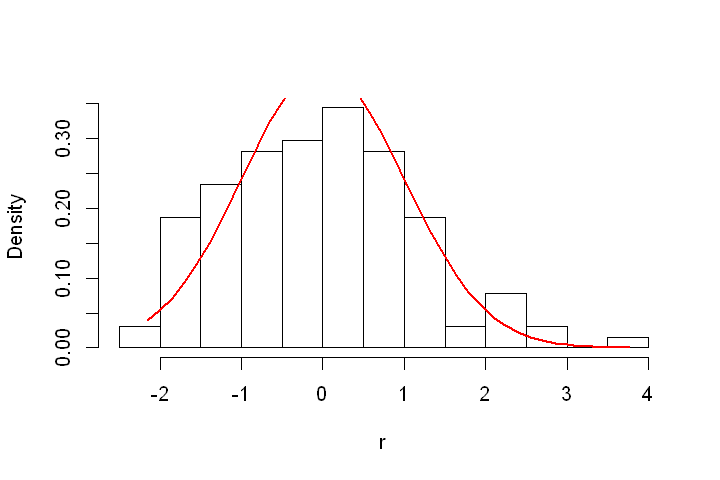

In [84]:
residues(lme_TBI)

In [85]:
S_data = Data_1 %>%
  select(S, TeaType, DoseN, Farmers,Site, #C_over_N, 
         NitrogenType) %>%
  drop_na(.) %>%
  droplevels(.)
#TBI_data_factor <- TBI_data
#TBI_data_factor$TeaType <- factor(TBI_data$TeaType, 
#                                      levels = levels(omdecomp_data$TeaType)[c(4,3,5,2,1)]) # Reorder

In [86]:
TBI_GreenTea <- subset(S_data, TeaType == "Green tea")

In [87]:
lme_S <- lme(fixed = S ~  DoseN + NitrogenType,
               random = ~ 1 | Farmers/Site,
               data = TBI_GreenTea) 

In [88]:
summary(lme_S)

Linear mixed-effects model fit by REML
 Data: TBI_GreenTea 
       AIC      BIC  logLik
  -279.136 -256.903 147.568

Random effects:
 Formula: ~1 | Farmers
         (Intercept)
StdDev: 3.723227e-06

 Formula: ~1 | Site %in% Farmers
        (Intercept)   Residual
StdDev:  0.04299008 0.06224558

Fixed effects: S ~ DoseN + NitrogenType 
                          Value  Std.Error  DF   t-value p-value
(Intercept)          0.24656689 0.02701601 116  9.126694  0.0000
DoseN                0.00042329 0.00027815 116  1.521808  0.1308
NitrogenTypeN-6-1-1  0.11853217 0.05742880 116  2.063985  0.0412
NitrogenTypeN-8-0-0  0.05705259 0.05169629 116  1.103611  0.2720
NitrogenTypeN-SCU   -0.00689129 0.02030607 116 -0.339371  0.7349
 Correlation: 
                    (Intr) DoseN  NTN-6- NTN-8-
DoseN               -0.303                     
NitrogenTypeN-6-1-1 -0.409 -0.061              
NitrogenTypeN-8-0-0 -0.473 -0.006  0.846       
NitrogenTypeN-SCU   -0.021 -0.217  0.054  0.047

Standardized Withi

In [89]:
ranef(lme_S)

,(Intercept)
Belanger,1.269479e-10
Fortier,-1.269479e-10
,(Intercept)
Belanger/10,1.692478e-02
Belanger/A9,4.672425e-17
Fortier/45,3.045139e-02
Fortier/9,-4.737618e-02


In [90]:
summary(lme_S)$tTable

,Value,Std.Error,DF,t-value,p-value
(Intercept),0.2465668857,0.027016012,116,9.1266943,2.635135e-15
DoseN,0.0004232879,0.000278148,116,1.5218079,1.307786e-01
NitrogenTypeN-6-1-1,0.1185321737,0.057428804,116,2.0639847,4.124955e-02
NitrogenTypeN-8-0-0,0.0570525938,0.051696286,116,1.1036111,2.720460e-01
NitrogenTypeN-SCU,-0.0068912866,0.020306074,116,-0.3393707,7.349441e-01


In [91]:
attributes(summary(lme_S))

$names
 [1] "modelStruct"  "dims"         "contrasts"    "coefficients" "varFix"      
 [6] "sigma"        "apVar"        "logLik"       "numIter"      "groups"      
[11] "call"         "terms"        "method"       "fitted"       "residuals"   
[16] "fixDF"        "na.action"    "data"         "corFixed"     "tTable"      
[21] "BIC"          "AIC"         

$class
[1] "summary.lme" "lme"        

$verbose
[1] FALSE

$oClass
[1] "lme"

In [92]:
anova(lme_S)

,numDF,denDF,F-value,p-value
(Intercept),1,116,154.592930,0.00000000
DoseN,1,116,2.897476,0.09139685
NitrogenType,3,116,1.972322,0.12198490


In [93]:
pseudoR2(y=TBI_GreenTea$S, # [omdecomp_data$TauxDecomposition_C > 0]
         y_hat = predict(lme_S, level=0))

[1] 0.1907776

[1] "Shapiro-Wilk:"

	Shapiro-Wilk normality test

data:  r
W = 0.89594, p-value = 8.34e-08

[1] "Kurtosis: 6.33426604324906"
[1] "Skewness: 1.45996663413087"


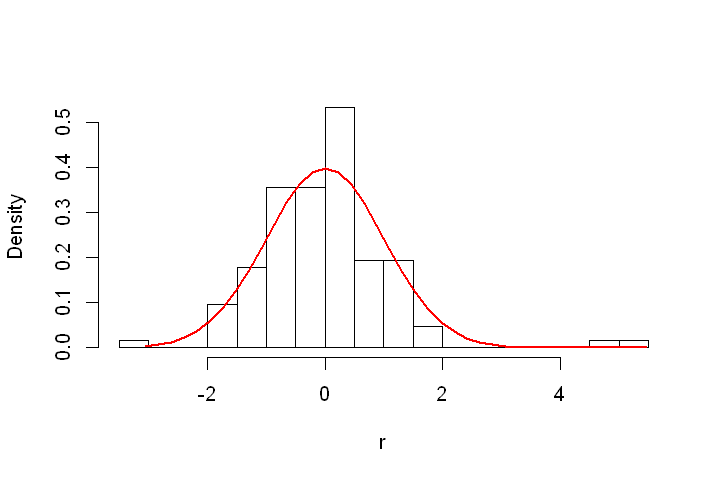

In [94]:
residues(lme_S)

In [95]:
weightdiff_gg_S = data.frame(intervals(lme_S, which = "fixed")$fixed)

In [96]:
weightdiff_gg_S$pvalue = summary(lme_S)$tTable[, 5]

In [97]:
weightdiff_gg_S$is_significant = ifelse(weightdiff_gg_S$pvalue <= 0.05,
                                      'Significant at 0.05 level',
                                      'Not significant at 0.05 level')

In [98]:
weightdiff_gg_S$variable = rownames(weightdiff_gg_S)

In [99]:
weightdiff_gg_S$variable

[1] "(Intercept)"         "DoseN"               "NitrogenTypeN-6-1-1"
[4] "NitrogenTypeN-8-0-0" "NitrogenTypeN-SCU"

In [100]:
weightdiff_gg_S$variable[c(3,4,5)] <- c('N-6-1-1', 'N-8-0-0',
                                   'N-SCU-39-0-0')

In [101]:
weightdiff_gg_S$facet = factor(c('Intercept','N dosage',
                               'N source', 'N source', 'N source'))

In [102]:
weightdiff_gg_S = weightdiff_gg_S[-1, ] # remove the intercept

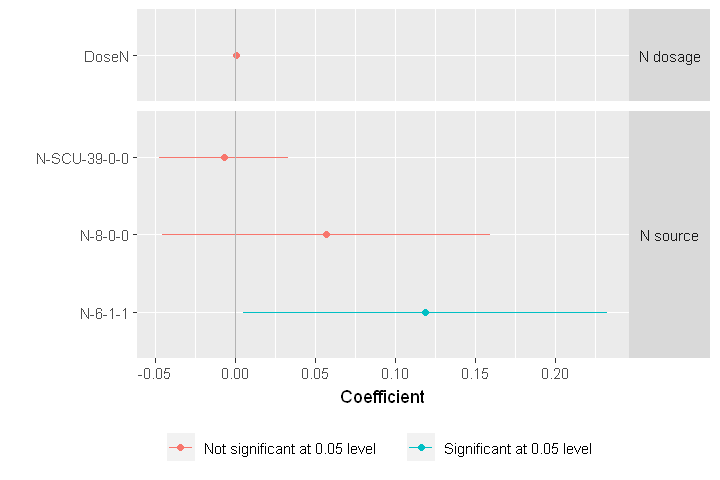

In [103]:
ggplot(weightdiff_gg_S, aes(x = est., y=variable, colour=is_significant)) +
  facet_grid(facet ~ ., scales = 'free', space = 'free') +
  geom_point() +
  geom_segment(aes(x=lower, xend=upper, y=variable, yend=variable)) +
  geom_vline(xintercept = 0, colour='grey70') +
  xlab('Coefficient') +
  ylab('') +
  theme(strip.text.y = element_text(angle=0),
        legend.title = element_blank(),
        legend.position = "bottom")

In [104]:
ggsave("Figure6.png", width = 8, height = 5, dpi = 600)# export plot high resolution

# reproducing keuskamp TBI

In [105]:
library(readxl)
library("ggrepel")
Data_1_tbi <- read_excel('KEUSKAMP TBI DATA2.xlsx')

Warning message:
"package 'ggrepel' was built under R version 3.6.2"

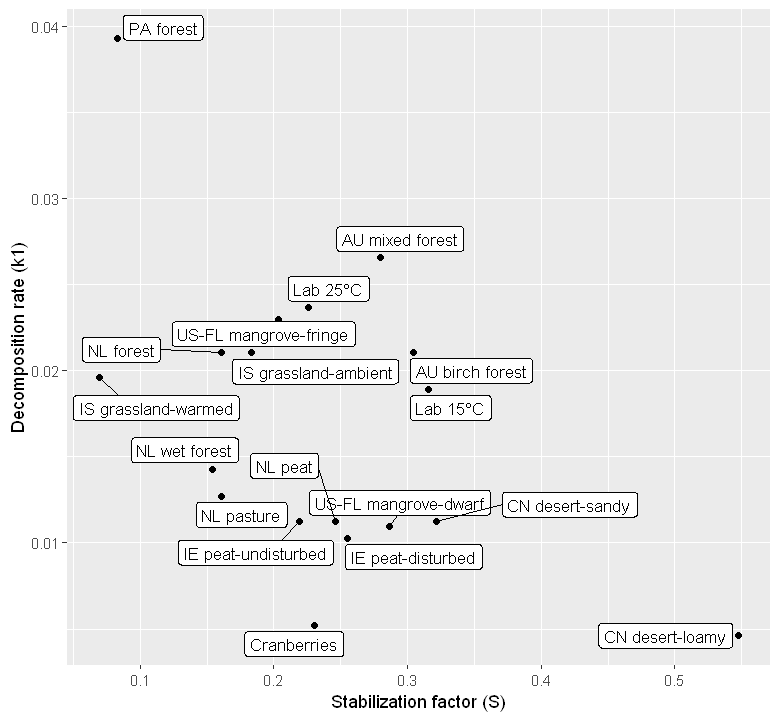

In [106]:
options(repr.plot.width=6.5, repr.plot.height=6)
ggplot(data=Data_1_tbi, aes(x= Stabilisation_factor_S, y=Decomposition_rate_K, group=Region)) +
  geom_point()+
#geom_text(aes(label=Nombre))
  #geom_text(aes(label=Region, nudge_x = 0.25, nudge_y = 0.25, check_overlap = T))
set.seed(42)+
geom_label_repel(aes(label = Region),
                    #fill = Region), 
                 color = 'black',
                    size = 3.5) +
   theme(legend.position = "none")+
labs(x = "Stabilization factor (S)",
       y = "Decomposition rate (k1)") 

In [107]:
ggsave("TBI keuskamp modifié.png", width = 6, height = 6, dpi = 120)# export plot high resolution